In [2]:
#pip install jieba 安裝套件

In [3]:
import jieba

In [4]:
import jieba.analyse

In [5]:
import pandas as pd

In [117]:
import numpy as np

In [7]:
from collections import Counter

In [8]:
telldata =pd.read_csv("HW04-1.csv")

In [9]:
telldata.head()

,作者,內容
0,Anonymous,老師好帥～想問老師現在有伴侶嗎？
1,薛雅云,請問可不可以推薦適合我們的工作？
2,Anonymous,既然那麼討厭台灣，為什麼不以自願取得外國國籍，放棄台灣國籍身份？
3,60771026H_張曦舫,科技與工程教育組
4,Anonymous,想請問保養的祕訣


In [10]:
#斷句範例
doct=["我是吳沛龍老師在龍門國中教書"]
for sentence in doct:#取出文章中的第一句
    doct_list=jieba.cut(sentence)
    print("-".join(doct_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\paylung\AppData\Local\Temp\jieba.cache
Loading model cost 0.667 seconds.
Prefix dict has been built successfully.


我-是-吳沛龍-老師-在-龍門國-中教書


#建立斷詞字典再重新跑一次
jieba.load_userdict("userdic.txt")
for sentence in doct:#取出文章中的第一句
    doct_list=jieba.cut(sentence)
    print("-".join(doct_list))

In [11]:
#建立斷詞字典再重新跑一次 
jieba.load_userdict("userdic.txt") 
for sentence in doct:
    #取出文章中的第一句 
    doct_list=jieba.cut(sentence)
    print("-".join(doct_list))

我-是-吳沛龍-老師-在-龍門國中-教書


In [12]:
telldata["項目"]=""
telldata.head()

,作者,內容,項目
0,Anonymous,老師好帥～想問老師現在有伴侶嗎？,
1,薛雅云,請問可不可以推薦適合我們的工作？,
2,Anonymous,既然那麼討厭台灣，為什麼不以自願取得外國國籍，放棄台灣國籍身份？,
3,60771026H_張曦舫,科技與工程教育組,
4,Anonymous,想請問保養的祕訣,


In [33]:
index = 0
for sentence in telldata["內容"]:#取出表格中的內容
    doct_list=jieba.analyse.extract_tags(sentence,250)#挑出250個最重要的單詞
    telldata["項目"].iloc[index]=doct_list#將每個字句的重點單詞放在各個項目之中
    index += 1

In [34]:
telldata["項目"]

0                                     [老師, 想問, 伴侶]
1                           [推薦, 適合, 我們, 可不可以, 工作]
2     [那麼, 討厭, 台灣, 自願, 外國國籍, 放棄, 台灣國籍, 不以, 身份, 取得]
3                                     [科技, 工程, 教育]
4                                               []
                          ...                     
72            [超英, 認為, 單單, 先進, 思維, 台灣, 趕美, 依靠, 可以]
73           [項目, 收購, 創業, 會主動, 更廣, 更深, 公司, 合作, 一起]
74                                [怎麼, 中國, 看待, 崛起]
75                                    [哪個, 加盟, 品牌]
76                                [浴缸, 老師, 怎樣, 你家]
Name: 項目, Length: 77, dtype: object

In [85]:
jieba.load_userdict("userdic.txt") #將字補完整
jieba.analyse.set_stop_words("noword.txt") #去除不重要的字，要放在同個資料夾
index = 0
for sentence in telldata["內容"]:#取出表格中的內容(各列裡面)
    doct_list=jieba.analyse.extract_tags(sentence,20)#挑出20個權重最高的單詞
    telldata["項目"].iloc[index]=doct_list#將每個字句的重點單詞放在各個項目之中
    index += 1
telldata["項目"]

0                                  [老師, 伴侶]
1                    [推薦, 適合, 我們, 可不可以, 工作]
2      [討厭, 台灣, 自願, 外國國籍, 放棄, 台灣國籍, 身份, 取得]
3                              [科技, 工程, 教育]
4                                        []
                      ...                  
72         [超英, 認為, 先進, 思維, 台灣, 趕美, 依靠, 可以]
73    [項目, 收購, 創業, 會主動, 更廣, 更深, 公司, 合作, 一起]
74                             [中國, 看待, 崛起]
75                                 [加盟, 品牌]
76                             [浴缸, 老師, 你家]
Name: 項目, Length: 77, dtype: object

In [86]:
telldata.to_csv("keywords_1st.csv".index=False)#輸出為keywords_1st的CSV檔

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (482823981.py, line 1)

In [87]:
Counter(telldata["作者"]).keys()#抓出所有的作者

dict_keys(['Anonymous', '薛雅云', '60771026H_張曦舫', '張育嘉(61071010H)', '61071015h', '61071001H', '61071014h', '61071020h', '61071007H', 'PEI LUNG', '61071027h', '61071003H', '60971042H', '60971018H_翁子涵', '61071011h', '61071005h', '蔡孟辰', '60971041H', '61071016H', '吳詩怡61071009H', '60971038h_陳妍靜', '61071021H', '61071006H', '60971031H', '61071031H', '61071008H', '曾品翔', '60971032H'])

In [88]:
words=list(telldata["作者"])
show_key=pd.DataFrame(Counter(words).keys())#那些作者
show_values=pd.DataFrame(Counter(words).values())#出現次數

In [89]:
do=[show_key,show_values]
do

[                 0
 0        Anonymous
 1              薛雅云
 2    60771026H_張曦舫
 3   張育嘉(61071010H)
 4        61071015h
 5        61071001H
 6        61071014h
 7        61071020h
 8        61071007H
 9         PEI LUNG
 10       61071027h
 11       61071003H
 12       60971042H
 13   60971018H_翁子涵
 14       61071011h
 15       61071005h
 16             蔡孟辰
 17       60971041H
 18       61071016H
 19    吳詩怡61071009H
 20   60971038h_陳妍靜
 21       61071021H
 22       61071006H
 23       60971031H
 24       61071031H
 25       61071008H
 26             曾品翔
 27       60971032H,
      0
 0   17
 1    3
 2    4
 3    2
 4    2
 5    4
 6    2
 7    1
 8    3
 9    4
 10   1
 11   3
 12   3
 13   1
 14   2
 15   3
 16   1
 17   2
 18   6
 19   1
 20   1
 21   2
 22   2
 23   1
 24   2
 25   2
 26   1
 27   1]

In [90]:
result=pd.concat(do,axis=1)#表格化
result

,0,0
0,Anonymous,17
1,薛雅云,3
2,60771026H_張曦舫,4
3,張育嘉(61071010H),2
4,61071015h,2
5,61071001H,4
6,61071014h,2
7,61071020h,1
8,61071007H,3
9,PEI LUNG,4


In [91]:
result.columns=["作者","回答次數"]#增加標頭
result

,作者,回答次數
0,Anonymous,17
1,薛雅云,3
2,60771026H_張曦舫,4
3,張育嘉(61071010H),2
4,61071015h,2
5,61071001H,4
6,61071014h,2
7,61071020h,1
8,61071007H,3
9,PEI LUNG,4


In [92]:
#資料視覺化
import plotly.express as px
import pandas as pd
px.bar(result,x="作者",y="回答次數",title="第一次演講回答次數表")

In [93]:
show_sub=telldata["作者"]=="Anonymous"#作者是這個人的時候
subdata=telldata[show_sub]#用subdata放入是這個人的所有資料
subdata

,作者,內容,項目
0,Anonymous,老師好帥～想問老師現在有伴侶嗎？,"[老師, 伴侶]"
2,Anonymous,既然那麼討厭台灣，為什麼不以自願取得外國國籍，放棄台灣國籍身份？,"[討厭, 台灣, 自願, 外國國籍, 放棄, 台灣國籍, 身份, 取得]"
4,Anonymous,想請問保養的祕訣,[]
6,Anonymous,請問要如何兼顧事業與愛情?,"[兼顧, 事業, 愛情]"
7,Anonymous,請問如果以您的觀點來說，台灣是個偽善充滿詐欺的地方，那麼世界上其他國家呢？如果全世界大多數國...,"[台灣, 觀點, 偽善, 國家, 相處, 離開, 如果, 方法, 世界, 全世界, 大多, ..."
14,Anonymous,想請老師用一句話總結自己目前的人生,"[總結, 人生, 一句, 目前, 自己]"
15,Anonymous,台灣如此可怕，該逃去哪個國家?,"[台灣, 國家, 可怕]"
19,Anonymous,請問您的理想是什麼？,[理想]
25,Anonymous,好奇老師您之前最高的年薪有多少,"[老師, 年薪, 好奇, 多少, 之前, 最高]"
42,Anonymous,區塊鏈該如何入門?網路平台有許多nft詐騙的經驗與分享，不斷勸退大家，所以想聽聽講師如何入門...,"[入門, 區塊鏈, 網路, nft, 詐騙, 經驗, 講師, 平台, 安全]"


In [94]:
#這位作者他講的項目有哪些
type(subdata["項目"])#確認類型

pandas.core.series.Series

In [95]:
telldata_import_list=subdata["項目"].tolist()#將這個內容轉成表單
type(telldata_import_list)

list

In [96]:
telldata_import_list

[['老師', '伴侶'],
 ['討厭', '台灣', '自願', '外國國籍', '放棄', '台灣國籍', '身份', '取得'],
 [],
 ['兼顧', '事業', '愛情'],
 ['台灣',
  '觀點',
  '偽善',
  '國家',
  '相處',
  '離開',
  '如果',
  '方法',
  '世界',
  '全世界',
  '大多',
  '地方',
  '其他'],
 ['總結', '人生', '一句', '目前', '自己'],
 ['台灣', '國家', '可怕'],
 ['理想'],
 ['老師', '年薪', '好奇', '多少', '之前', '最高'],
 ['入門', '區塊鏈', '網路', 'nft', '詐騙', '經驗', '講師', '平台', '安全'],
 ['Anonymous', '什麼樣', '金錢', '有意', '除了', '事情'],
 ['虛擬', '貨幣', 'NFT', '泡沫化', '事情'],
 ['問有', 'tinder'],
 ['超英', '認為', '先進', '思維', '台灣', '趕美', '依靠', '可以'],
 ['中國', '看待', '崛起'],
 ['加盟', '品牌'],
 ['浴缸', '老師', '你家']]

In [97]:
#根據上面再去調整一次你的關鍵字
#中括號中有中括號，要拉成一整條

In [107]:
flat=[x for sublist in telldata_import_list for x in sublist]#將所有東西都拆除掛號把它列出來
diction=Counter(flat)
diction

Counter({'老師': 3,
         '伴侶': 1,
         '討厭': 1,
         '台灣': 4,
         '自願': 1,
         '外國國籍': 1,
         '放棄': 1,
         '台灣國籍': 1,
         '身份': 1,
         '取得': 1,
         '兼顧': 1,
         '事業': 1,
         '愛情': 1,
         '觀點': 1,
         '偽善': 1,
         '國家': 2,
         '相處': 1,
         '離開': 1,
         '如果': 1,
         '方法': 1,
         '世界': 1,
         '全世界': 1,
         '大多': 1,
         '地方': 1,
         '其他': 1,
         '總結': 1,
         '人生': 1,
         '一句': 1,
         '目前': 1,
         '自己': 1,
         '可怕': 1,
         '理想': 1,
         '年薪': 1,
         '好奇': 1,
         '多少': 1,
         '之前': 1,
         '最高': 1,
         '入門': 1,
         '區塊鏈': 1,
         '網路': 1,
         'nft': 1,
         '詐騙': 1,
         '經驗': 1,
         '講師': 1,
         '平台': 1,
         '安全': 1,
         'Anonymous': 1,
         '什麼樣': 1,
         '金錢': 1,
         '有意': 1,
         '除了': 1,
         '事情': 2,
         '虛擬': 1,
         '貨幣': 1,
         'NFT

In [111]:
diction.keys()#挑出不重複的單詞

dict_keys(['老師', '伴侶', '討厭', '台灣', '自願', '外國國籍', '放棄', '台灣國籍', '身份', '取得', '兼顧', '事業', '愛情', '觀點', '偽善', '國家', '相處', '離開', '如果', '方法', '世界', '全世界', '大多', '地方', '其他', '總結', '人生', '一句', '目前', '自己', '可怕', '理想', '年薪', '好奇', '多少', '之前', '最高', '入門', '區塊鏈', '網路', 'nft', '詐騙', '經驗', '講師', '平台', '安全', 'Anonymous', '什麼樣', '金錢', '有意', '除了', '事情', '虛擬', '貨幣', 'NFT', '泡沫化', '問有', 'tinder', '超英', '認為', '先進', '思維', '趕美', '依靠', '可以', '中國', '看待', '崛起', '加盟', '品牌', '浴缸', '你家'])

In [114]:
#pip install wordcloud文字雲安裝


     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00


In [129]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [130]:
mask=np.array(Image.open("ntnu_icon.png"))#用師大的校徽作排列的背景，需要存在同個資料夾
font="C:\Windows\Fonts\MSJH.TTC"#詳細資料的檔名

In [131]:
wordcloud=WordCloud(background_color="blue",font_path=font,mask=mask)
wordcloud.generate_from_frequencies(diction)

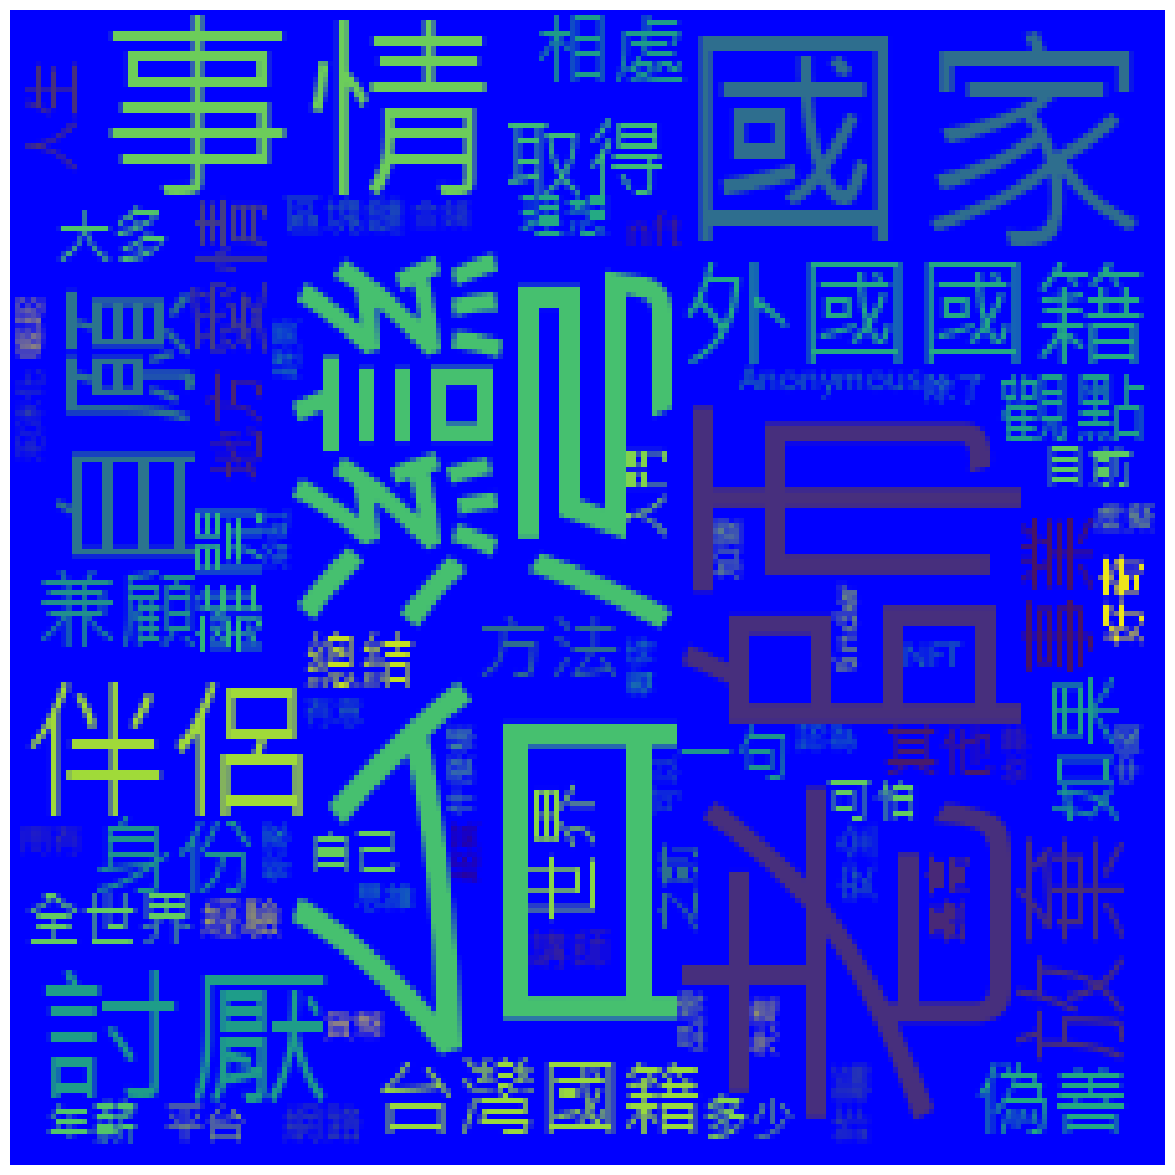

In [133]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()